# Initial Setup

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 150)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('future.no_silent_downcasting', True)
sns.set()

df = pd.read_csv('data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

print(df.shape)
df.head()

(1012, 15)


,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code
0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26.0,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,0.0
1,601292388085,United States,PC,organic,2019-05-01 06:56:16,2019-05-01 07:09:18,782.0,2019-05-01,5,3,7,NaN,NaN,NaN,NaN
2,852898876338,United States,Mac,социальные сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251.0,2019-05-01,5,3,4,NaN,NaN,NaN,NaN
3,998513020664,United States,iPhone,социальные сети,2019-05-01 18:53:42,2019-05-01 18:57:35,233.0,2019-05-01,5,3,18,NaN,NaN,NaN,NaN
4,240702200943,United States,Mac,социальные сети,2019-05-02 14:04:32,2019-05-02 14:09:51,319.0,2019-05-02,5,4,14,NaN,NaN,NaN,NaN


# Set Proper Data Types

In [8]:
dtype_mapping = {
    'user_id': 'int64', 
    'region': 'object', 
    'device': 'object', 
    'channel': 'object', 
    'session_start': 'datetime64[ns]', 
    'session_end': 'datetime64[ns]', 
    'sessiondurationsec': 'float64', 
    'session_date': 'datetime64[ns]', 
    'month': 'int64', 
    'day': 'int64', 
    'hour_of_day': 'int64', 
    'order_dt': 'datetime64[ns]', 
    'revenue': 'float64', 
    'payment_type': 'object', 
    'promo_code': 'float64'
}

df = df.astype(dtype_mapping)

# Custom Functions

In [4]:
def inspect_data(df):
    print(df.info())
    
    numeric_df = df.select_dtypes(include=[np.number]) 
    print("\nSummary Statistics For Numeric Columns:\n", numeric_df.describe())
    
    object_df = df.select_dtypes(include=['object'])
    print("\nSummary Statistics For Object Columns:\n", object_df.describe())
    
    datetime_df = df.select_dtypes(include=['datetime'])
    print("\nSummary Statistics For Datetime Columns:\n", datetime_df.describe())

    print("\nShape:", df.shape)

def inspect_unique(df):
    for column in df.columns:
        print(df[column].value_counts(dropna=False))
        print()

def plot_missing_values(df):
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Тепловая карта пропущенных значений")
    plt.show()

def plot_category(df, column, save=False):
    data = df[column].fillna('unknown')
    counts = data.value_counts()
    counts = counts.sort_index(key=lambda x: pd.to_numeric(x, errors='coerce'))

    plt.figure(figsize=(12,6))
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index,  
                order=counts.index, palette="viridis", legend=False)

    for index, value in enumerate(counts.values):
        plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Counts of {column}", fontsize=24)
    plt.xlabel(column.capitalize(), fontsize=14, labelpad=10)
    plt.ylabel('Count', fontsize=14)

    if save:
        plt.savefig(fname=f'./Graphs/{column}.png', format='png', bbox_inches='tight', dpi=300)
    
    plt.show()

# Inspect Dataframe

In [9]:
inspect_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1012 non-null   int64         
 1   region              999 non-null    object        
 2   device              999 non-null    object        
 3   channel             999 non-null    object        
 4   session_start       1012 non-null   datetime64[ns]
 5   session_end         1012 non-null   datetime64[ns]
 6   sessiondurationsec  1012 non-null   float64       
 7   session_date        1012 non-null   datetime64[ns]
 8   month               1012 non-null   int64         
 9   day                 1012 non-null   int64         
 10  hour_of_day         1012 non-null   int64         
 11  order_dt            285 non-null    datetime64[ns]
 12  revenue             285 non-null    float64       
 13  payment_type        285 non-null    object      

# Inspect Unique Values

In [ ]:
inspect_unique(df)

# Fix Typos

In [ ]:
corrections = {
    'Frаnce': 'France',
    'Frаncе': 'France',
    'Franсe': 'France',
    'Unjted States': 'United States',
    'germany': 'Germany',
    'UК': 'UK'
}

df['region'] = df['region'].replace(corrections)

corrections = {
    'android': 'Android'
}

df['device'] = df['device'].replace(corrections)

corrections = {
    'контексная реклама': 'контекстная реклама'
}

df['channel'] = df['channel'].replace(corrections)

# ??? Drop Exact Duplicates ???

In [ ]:
duplicates = df.duplicated().sum()
print('Number of complete duplicates:', duplicates)
df.drop_duplicates(inplace=True)

# PROMO CODE

In [ ]:
df[~df['promo_code'].isin([1, 0, np.nan])]

In [ ]:
df['promo_code'] = df['promo_code'].round()
df['promo_code'].value_counts(dropna=False)

# SESSION DURATION

In [ ]:
df['sessiondurationsec'] = df['sessiondurationsec'].round()

# Handling Missing Values

In [ ]:
plot_missing_values(df)

In [ ]:
# Let's handle missing values in region, device and channel columns first
# Let's check users that visited the website twice

user_counts = df['user_id'].value_counts()
user_ids_twice = user_counts[user_counts == 2].index

df[df['user_id'].isin(user_ids_twice)].sort_values(by=['user_id', 'session_start']).head(6)

In [ ]:
# As we can see, when a user visits website a second time, the values are NaN
# We assume that the user used the same values for region, device and channel

r_d_c = ['region', 'device', 'channel']
df[r_d_c] = df.groupby('user_id')[r_d_c].transform(lambda x: x.ffill())

In [ ]:
# Is there any NaN values left in those columns?

df[df[r_d_c].isna().all(axis=1)]

# BE CONSERVATIVE AND DO NOT DO ANYTHING

In [ ]:
# Check again for NaN values

plot_missing_values(df)

# Revenue

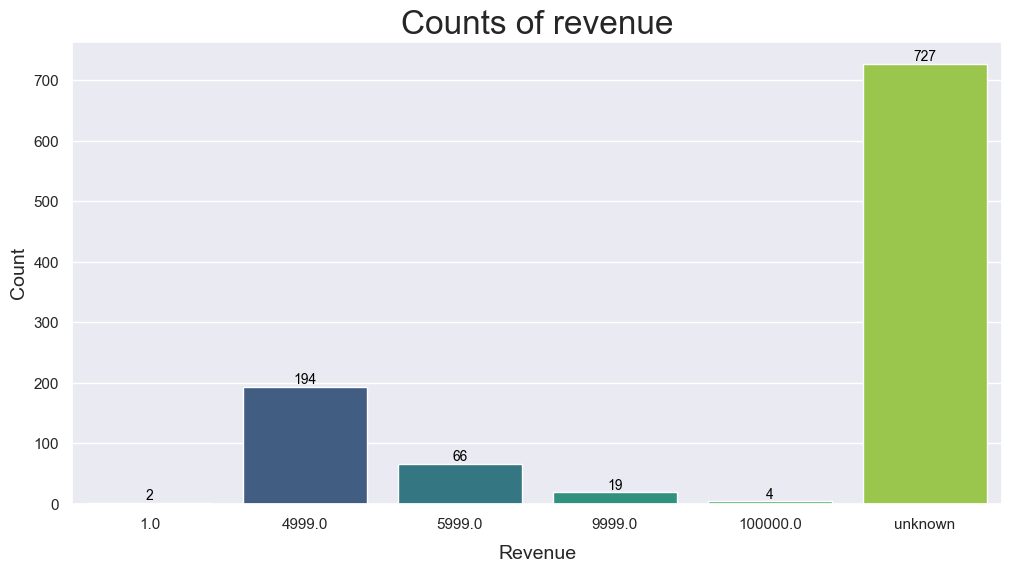

In [15]:
plot_category(df, 'revenue', save=False)

# Create New Feature With Discount Applied

`добавить столбец с итоговой суммой покупки с учетом применения
промокода на скидку 10%`

In [12]:
df['final_price'] = np.where(df['promo_code'] == 1, df['revenue'] * 0.9, df['revenue'])

In [13]:
df[df.revenue.notna()].reset_index()

,index,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code,final_price
0,0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26.000000,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,0.0,9999.0
1,20,771147371911,United States,Android,organic,2019-05-06 15:49:16,2019-05-06 15:53:16,240.000000,2019-05-06,5,1,15,2019-05-06 15:49:16,4999.0,Mobile payments,0.0,4999.0
2,28,245941309860,Germany,Mac,organic,2019-05-07 12:00:49,2019-05-07 13:10:26,4177.000000,2019-05-07,5,2,13,2019-05-07 12:01:43,4999.0,Mobile payments,1.0,4499.1
3,33,25672200561,Unjted States,Android,organic,2019-05-09 16:40:44,2019-05-09 16:41:31,47.000000,2019-05-09,5,4,16,2019-05-09 16:40:44,4999.0,Debit card,1.0,4499.1
4,34,241867611399,United States,PC,социальные сети,2019-05-09 09:23:22,2019-05-09 09:28:28,306.000000,2019-05-09,5,4,9,2019-05-09 09:23:24,4999.0,Mobile payments,0.0,4999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1000,903375623800,Germany,PC,контекстная реклама,2019-10-27 06:11:15,2019-10-27 06:48:03,2208.000000,2019-10-27,10,7,6,2019-10-27 06:11:15,4999.0,Debit card,0.0,4999.0
281,1001,917285763144,United States,iPhone,социальные сети,2019-10-27 17:05:01,2019-10-27 17:09:33,272.000000,2019-10-27,10,7,17,2019-10-27 17:05:05,4999.0,Mobile payments,0.0,4999.0
282,1005,323207942235,United States,PC,социальные сети,2019-10-28 15:20:25,2019-10-28 15:54:52,2067.000000,2019-10-28,10,1,15,2019-10-28 15:20:42,4999.0,Cash,1.0,4499.1
283,1006,347665115829,United States,Mac,социальные сети,2019-10-28 03:20:26,2019-10-28 03:32:52,746.000000,2019-10-28,10,1,3,2019-10-28 03:20:38,4999.0,E-wallet,0.0,4999.0


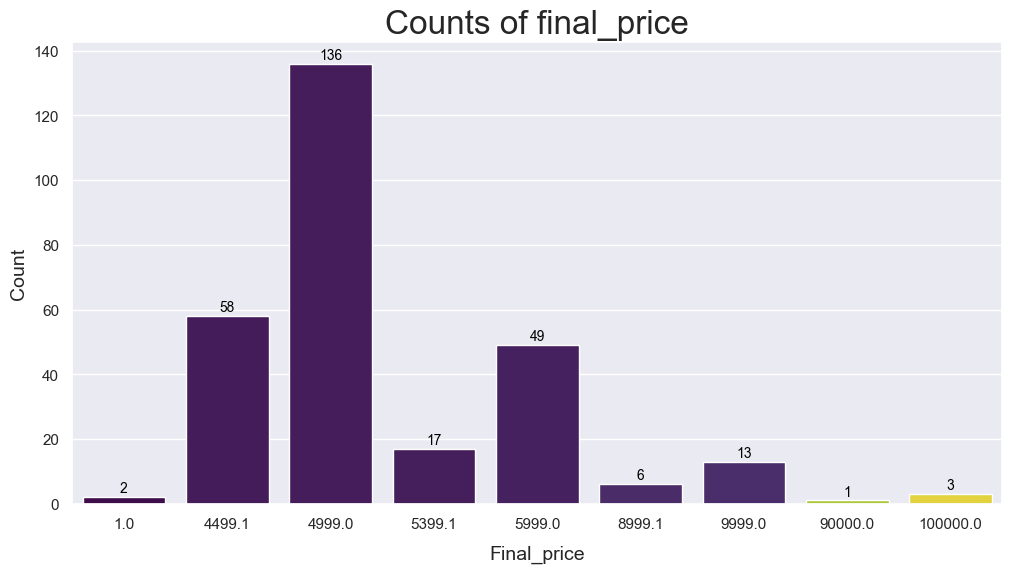

In [14]:
plot_category(df[df.revenue.notna()].reset_index(), 'final_price', save=False)

# Create New Feaute: Time of the Day

`добавить столбец с указанием времени суток визита (утро 06:00-09:59,
день 10:00-16:59, вечер 17:00-21:59, ночь 22:00-05:59)`

In [ ]:
def get_time_of_day(hour):
   if 6 <= hour < 10:
       return 'morning'
   elif 10 <= hour < 17:
       return 'day'  
   elif 17 <= hour < 22:
       return 'evening'
   else:
       return 'night'

df['time_of_day'] = df['hour_of_day'].map(get_time_of_day)

In [ ]:
df

In [ ]:
plot_category(df, 'time_of_day', save=False)

# Create New Feature: Did User Purchase

`добавить столбец “payer” с информацией о том, является ли
пользователь платящим или нет.`

In [ ]:
df['payer'] = df['revenue'].notna().astype(int)

# Inspect Data Again

In [ ]:
inspect_data(df)

# Save Changes

In [ ]:
df.to_csv('restart_data.csv', index=False)